Text(0, 0.5, 'qwerty dimension 2')

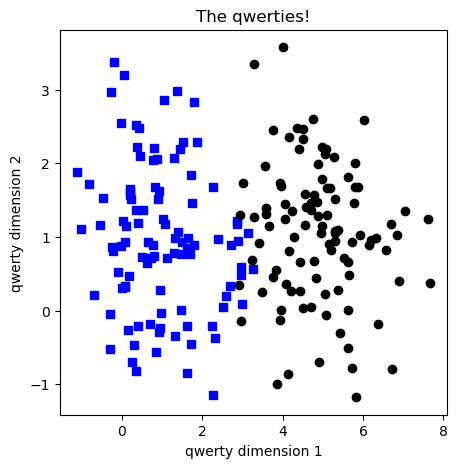

In [10]:
import torch
import torch.nn as nn
import numpy as np

import matplotlib.pyplot as plt

# create data
nPerClust = 100
blur = 1

A = [1,1]
B = [5,1]

# generate data
a = [ A[0] + np.random.randn(nPerClust)*blur, A[1] + np.random.randn(nPerClust)*blur]
b = [ B[0] + np.random.randn(nPerClust)*blur, B[1] + np.random.randn(nPerClust)*blur]

# true labels
labels_np = np.vstack((np.zeros((nPerClust,1)), np.ones((nPerClust,1))))

# concat into matrix
data_np = np.hstack((a,b)).T

# convert
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()


# show
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0], data[np.where(labels==0)[0],1], 'bs')
plt.plot(data[np.where(labels==1)[0],0], data[np.where(labels==1)[0],1], 'ko')
plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')


In [11]:
# inspect type
print(type(data_np))
print(np.shape(data_np))
print(' ')

print(type(data))
print(np.shape(data))

<class 'numpy.ndarray'>
(200, 2)
 
<class 'torch.Tensor'>
torch.Size([200, 2])


In [12]:
# build the model
ANNClassify = nn.Sequential(
    nn.Linear(2,1), # input, 2 features (x,y)
    nn.ReLU(),      # activation unit
    nn.Linear(1,1), # output unit - one output
    nn.Sigmoid()    # final activation unit
)

ANNClassify

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
  (3): Sigmoid()
)

In [13]:
learningRate = 0.01

# loss function
lossfun = nn.BCELoss() # Binary Cross Entropy

# optimizer
optimizer = torch.optim.SGD(ANNClassify.parameters(), lr=learningRate)

In [14]:
# train the model
numepochs = 1000
losses = torch.zeros(numepochs)

for epochi in range(numepochs):
    yHat = ANNClassify(data)
    # compute loss
    loss = lossfun(yHat, labels)
    losses[epochi] = loss

    # backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Text(0, 0.5, 'Loss')

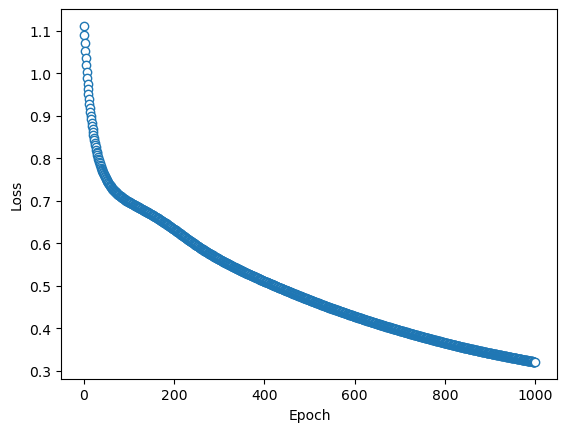

In [15]:
# show the losses
plt.plot(losses.detach(), 'o', markerfacecolor='w', linewidth=0.1)
plt.xlabel('Epoch')
plt.ylabel('Loss')


In [16]:
# predictions

predictions = ANNClassify(data)


predlabels = predictions > .5

# find errors
misclasified = np.where(predlabels != labels)[0]

# total accuracy
totalacc = 100 - 100*len(misclasified)/(2*nPerClust)

print('Final accuracy: %g%%' %totalacc)

Final accuracy: 90.5%


Text(0.5, 1.0, '90.5% correct')

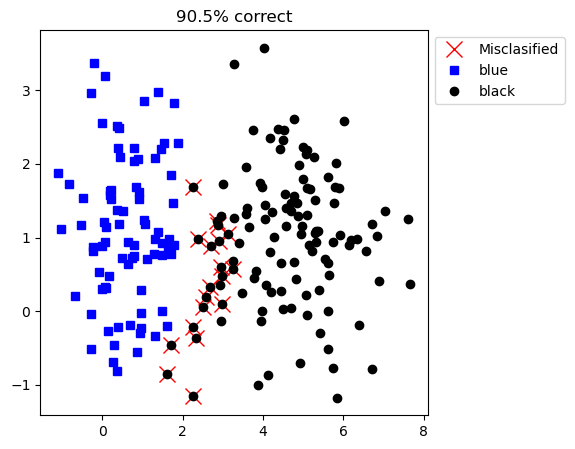

In [18]:
fig = plt.figure(figsize=(5,5))
plt.plot(data[misclasified,0], data[misclasified,1], 'rx', markersize=12)
plt.plot(data[np.where(~predlabels)[0],0], data[np.where(~predlabels)[0],1], 'bs')
plt.plot(data[np.where(predlabels)[0],0], data[np.where(predlabels)[0],1], 'ko')

plt.legend(['Misclasified', 'blue', 'black'], bbox_to_anchor=(1,1))
plt.title(f'{totalacc}% correct')